In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

train_dir = 'pre_processed_pan_cards/train'
val_dir = 'pre_processed_pan_cards/val'
test_dir = 'pre_processed_pan_cards/test'
img_size = 512

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 92 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 21 images belonging to 1 classes.


In [ ]:
# Loading EfficientNetB0 as base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freezing base model layers
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 67s 31s/step - accuracy: 0.7417 - loss: 0.4700 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 14s 15s/step - accuracy: 1.0000 - loss: 0.0017

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 2.0830e-04
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 25s/step - accuracy: 1.0000 - loss: 1.3826e-04 - val_accuracy: 1.0000 - val_loss: 1.0731e-05
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 9s/step - accuracy: 1.0000 - loss: 8.9276e-06 - val_accuracy: 1.0000 - val_loss: 3.2105e-06
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 50s 24s/step - accuracy: 1.0000 - loss: 3.5849e-06 - val_accuracy: 1.0000 - val_loss: 4.3295e-07
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 10s/step - accuracy: 1.0000 - loss: 6.6198e-07 - val_accuracy: 1.0000 - val_loss: 1.8402e-07
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 24s/step - accuracy: 1.0000 - loss: 1.9829e-07 - val_accuracy: 1.0000 - val_loss: 4.1844e-08
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 1.0000 - loss: 1.9251e-08 - val_accuracy: 1.0000 - val_loss: 2.2044e-08
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 58s 22s/step - accuracy: 1.0000 - loss: 2.1376e-08 

In [ ]:
# Evaluating the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 1.0000 - loss: 3.7040e-09
Test Accuracy: 100.00%


In [ ]:
# Predict on the test set
y_probs = model.predict(test_generator)  # Outputs probabilities
y_pred_labels = (y_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# True labels from the test generator
y_true = test_generator.classes

# Confidence scores
confidence_scores = y_probs.flatten()

results_df = pd.DataFrame({
    "True Label": y_true,
    "Predicted Label": y_pred_labels,
    "Confidence Score": confidence_scores
})

print("Prediction Results:")
print(results_df)
print("\n")
print("Classification Report:")
print(classification_report(y_true, y_pred_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Prediction Results:
    True Label  Predicted Label  Confidence Score
0            0                0      4.000313e-10
1            0                0      1.312873e-10
2            0                0      4.874984e-10
3            0                0      1.469020e-09
4            0                0      4.482241e-09
5            0                0      6.092177e-10
6            0                0      3.632406e-09
7            0                0      9.643146e-10
8            0                0      1.230060e-09
9            0                0      1.811981e-09
10           0                0      9.193415e-10
11           0                0      3.936059e-08
12           0                0      1.235689e-09
13           0                0      5.406943e-10
14           0                0      4.593420e-09
15           0                0      6.867868e-10
16           0                0      1.379090e-09
17           0                0      1.611

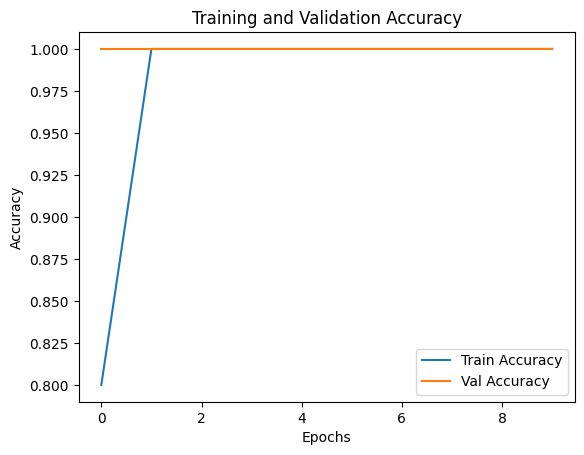

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()